# Census Income Project

In [124]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


# Import Dataset

In [125]:
df=pd.read_csv("census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [126]:
df.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [127]:
df.tail(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [128]:
df.sample(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
25245,54,Self-emp-not-inc,36327,7th-8th,4,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,50,United-States,<=50K
11974,33,Local-gov,183923,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,7688,0,35,United-States,>50K
1910,39,Private,191807,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,48,United-States,<=50K
4561,29,Private,370494,HS-grad,9,Never-married,Other-service,Unmarried,White,Female,0,0,40,Mexico,<=50K
22108,66,?,186030,7th-8th,4,Married-civ-spouse,?,Husband,White,Male,0,0,32,United-States,<=50K


# Exploratory Data Analysis

In [129]:
df.shape

(32560, 15)

In [130]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [132]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Let check how many question mark (" ?") inside dataset.

In [133]:
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

Fixing '?' values in the dataset

In [134]:
df=df.replace(' ?',np.NaN)

Let check if any whitespace, 'NA' or '-' exist in dataset.

In [135]:
df.isin([' ','NA','-']).sum().any()

False

Let check for any entry which is repeated or duplicated in dataset.

In [136]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [137]:
df.duplicated().sum()

24

Let drop duplicated entry from dataset before checking null values

In [138]:
df.drop_duplicates(inplace=True)

In [139]:
df.shape

(32536, 15)

<Axes: >

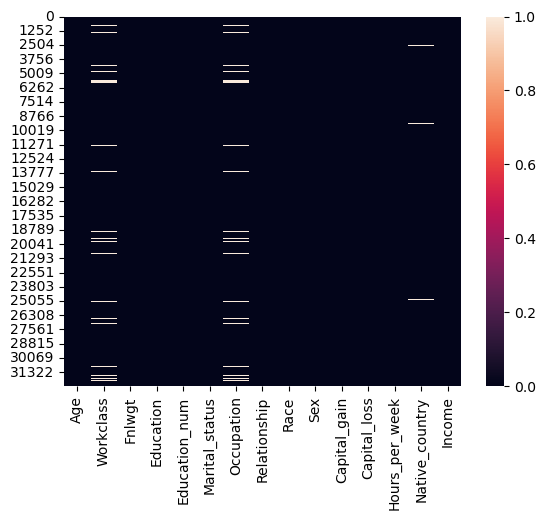

In [140]:
sns.heatmap(df.isnull())

There are missing values in Occupation,workclass, Native country.

In [141]:
# Imputating Missing value with mode for categorical features
df['Occupation'].fillna(df['Occupation'].mode()[0],inplace=True)
df['Workclass'].fillna(df['Workclass'].mode()[0],inplace=True)
df['Native_country'].fillna(df['Native_country'].mode()[0],inplace=True)

In [142]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [143]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [144]:
df['Income'].value_counts()

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64

<Axes: xlabel='Income', ylabel='count'>

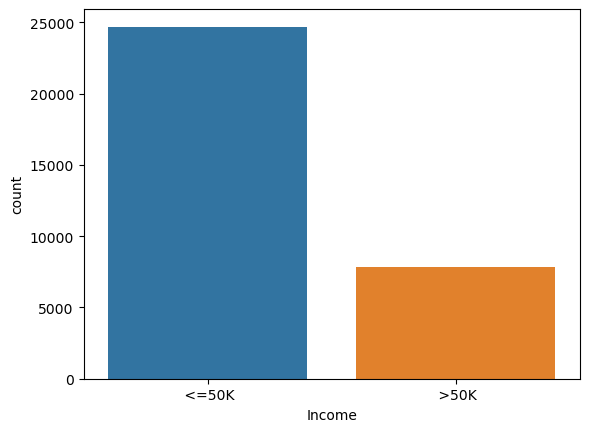

In [145]:
# Countplot
sns.countplot(x='Income',data=df)

<Axes: xlabel='Age', ylabel='count'>

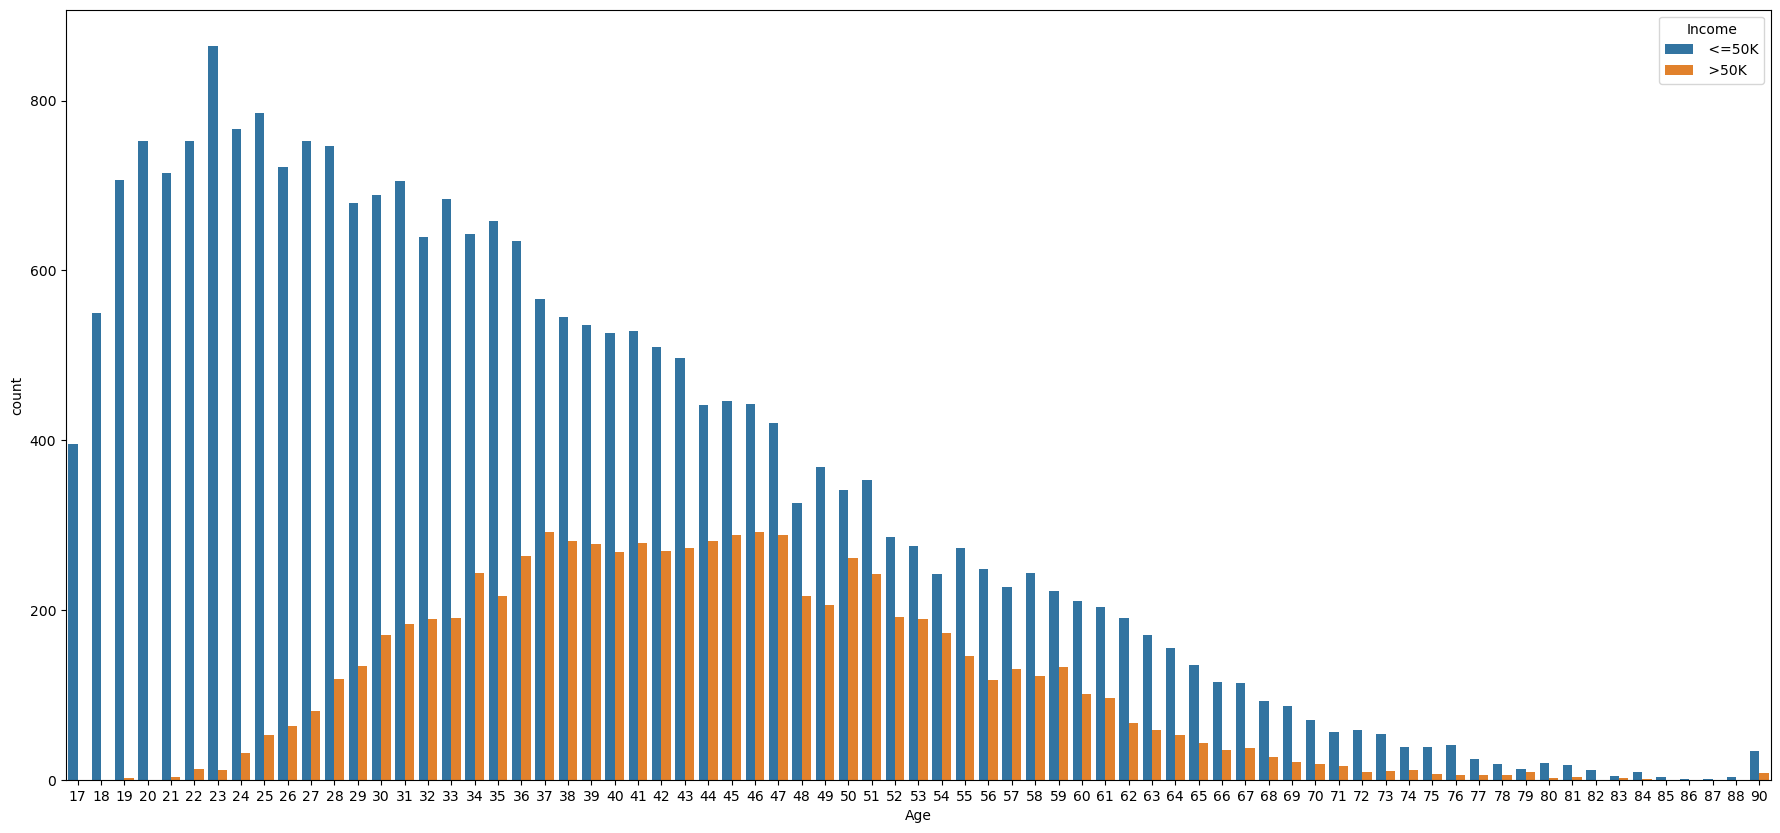

In [146]:
# Income distribution as per Age
plt.figure(figsize=(22,10))
sns.countplot(x='Age', hue='Income', data=df)

<Axes: xlabel='Workclass', ylabel='count'>

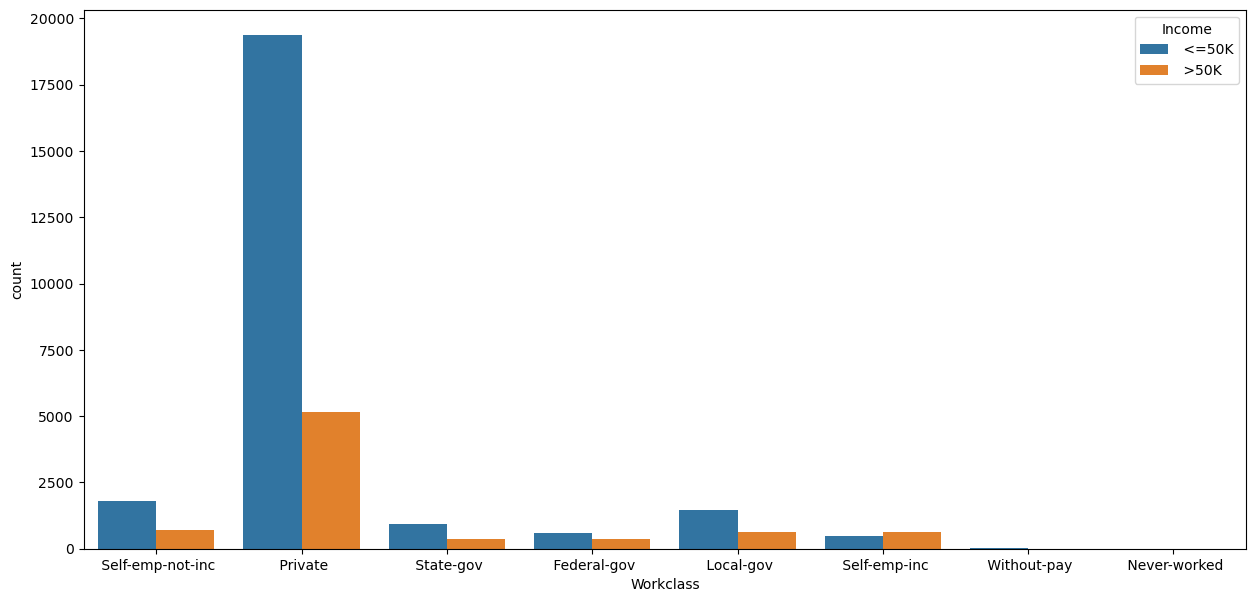

In [147]:
# Income distribution as per Workclass
plt.figure(figsize=(15,7))
sns.countplot(x='Workclass', hue='Income', data=df)

<Axes: xlabel='Education', ylabel='count'>

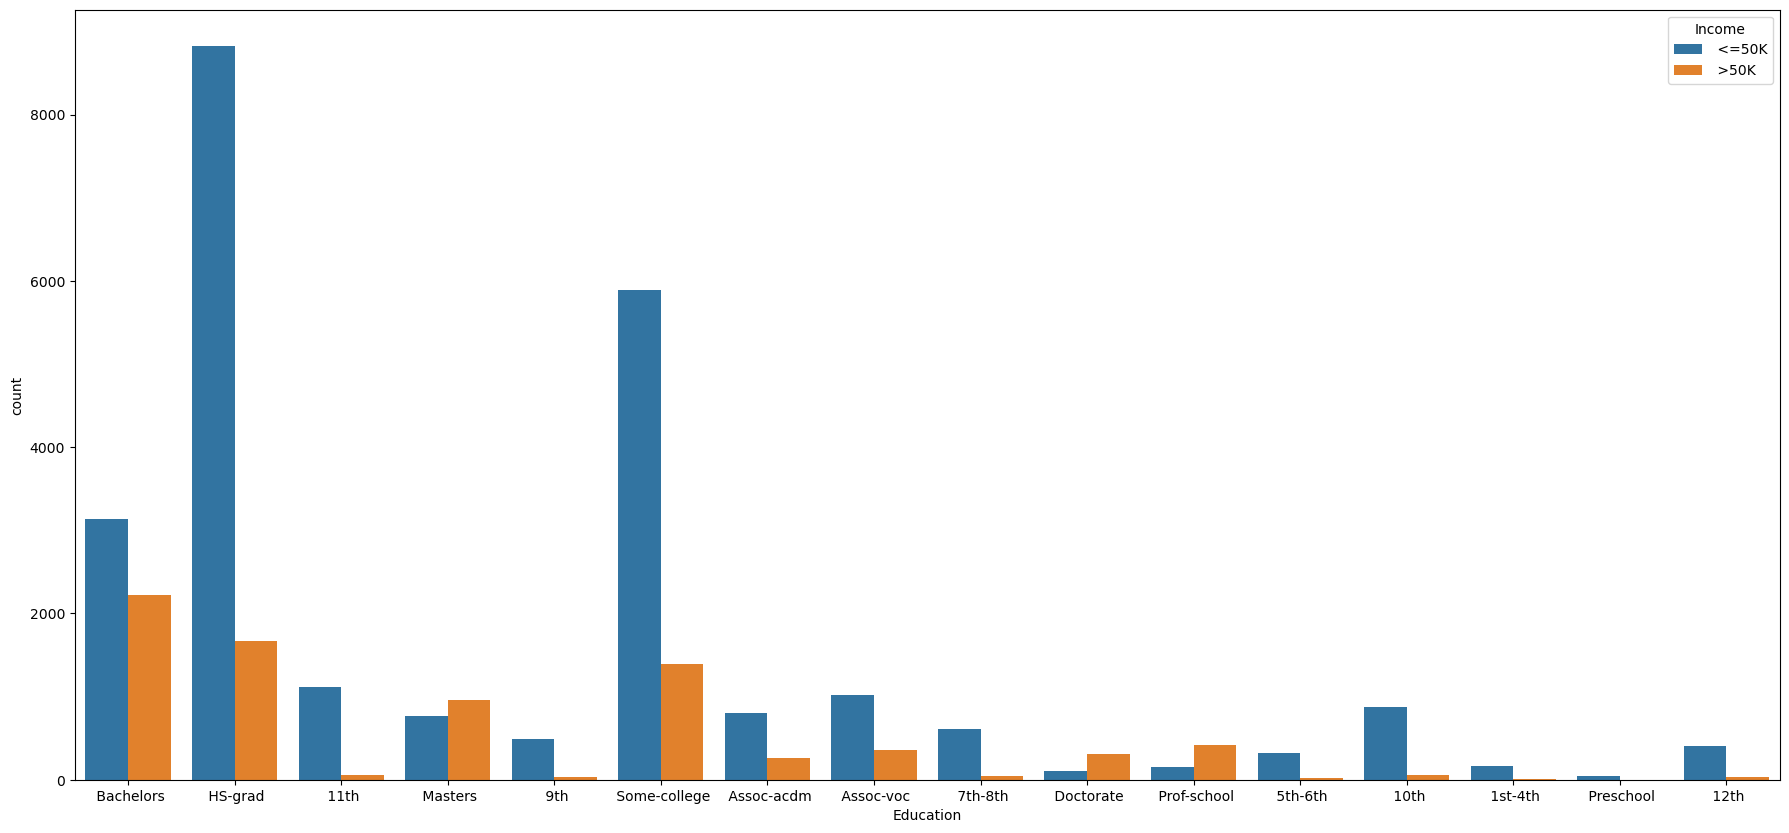

In [148]:
# Income distribution as per Education
plt.figure(figsize=(22,10))
sns.countplot(x='Education', hue='Income', data=df)

<Axes: xlabel='Marital_status', ylabel='count'>

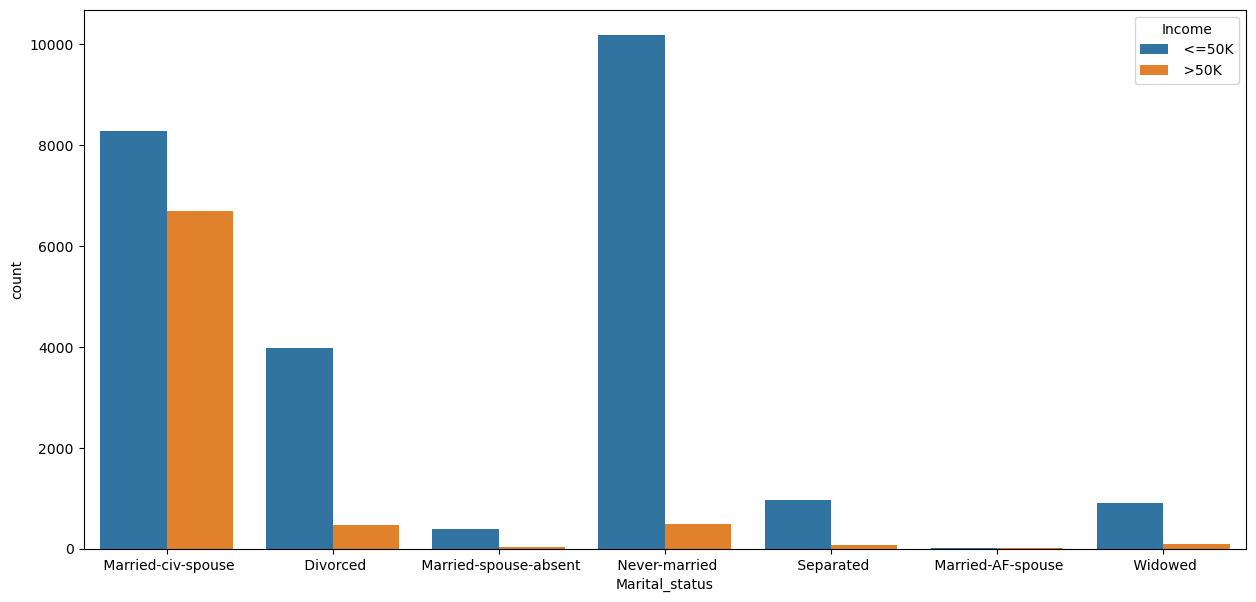

In [149]:
# Income distribution as per Marital_status
plt.figure(figsize=(15,7))
sns.countplot(x='Marital_status', hue='Income', data=df)

<Axes: xlabel='Occupation', ylabel='count'>

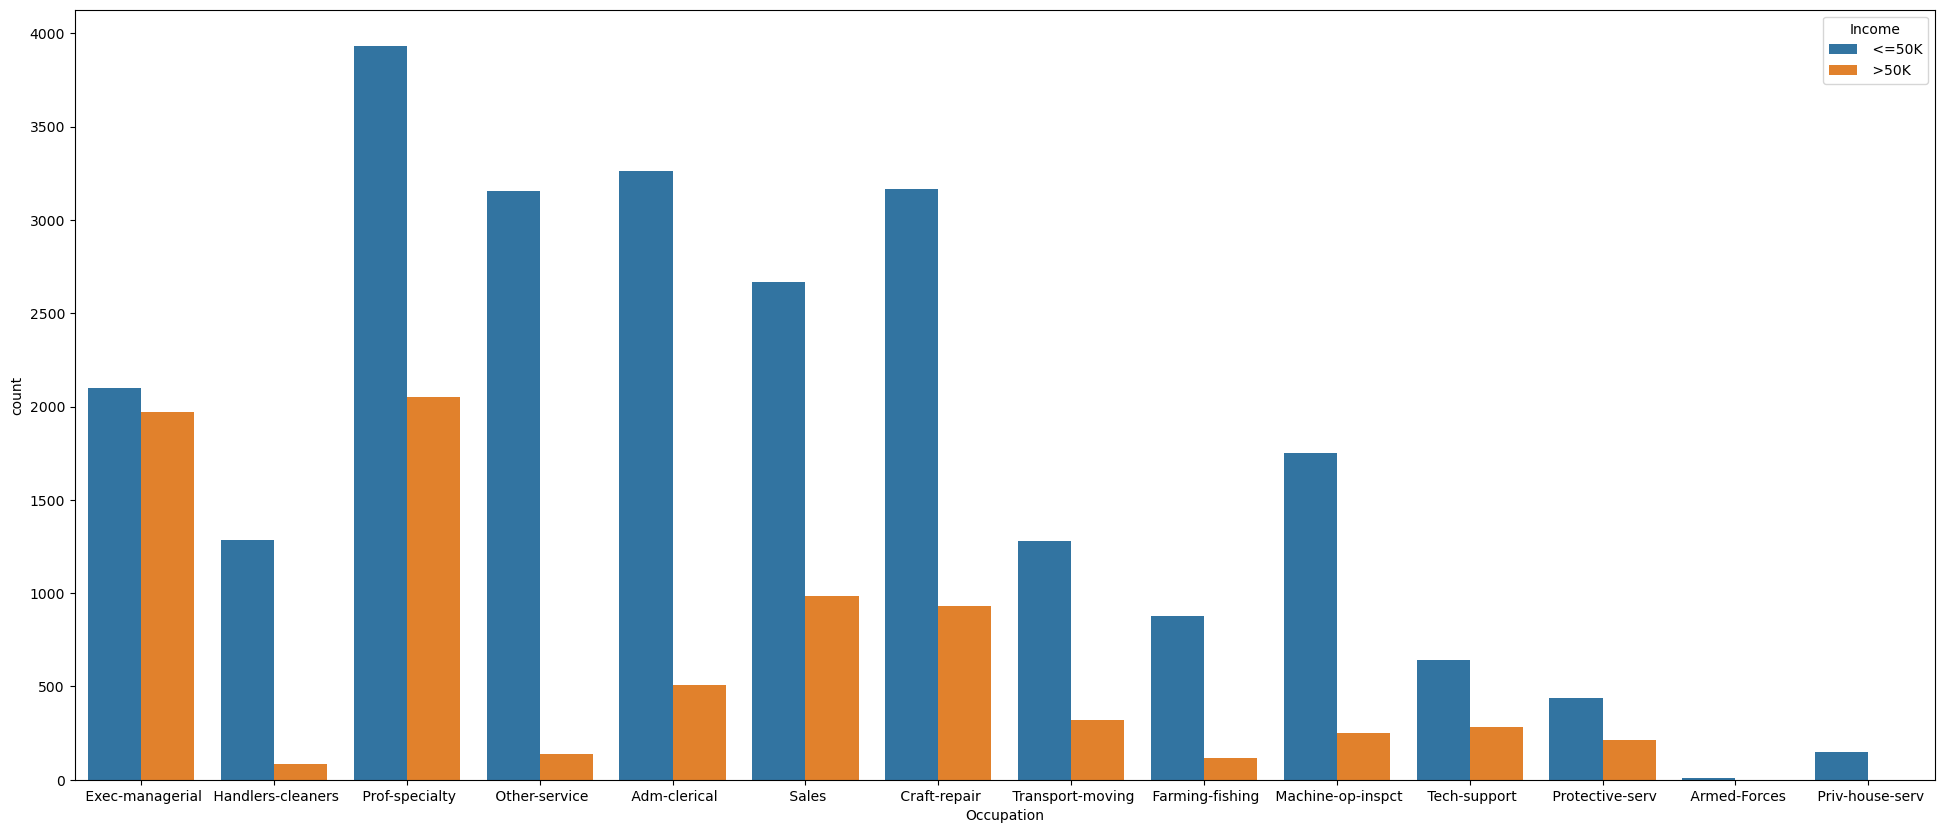

In [150]:
# Income distribution as per Occupation
plt.figure(figsize=(24,10))
sns.countplot(x='Occupation', hue='Income', data=df)

<Axes: xlabel='Relationship', ylabel='count'>

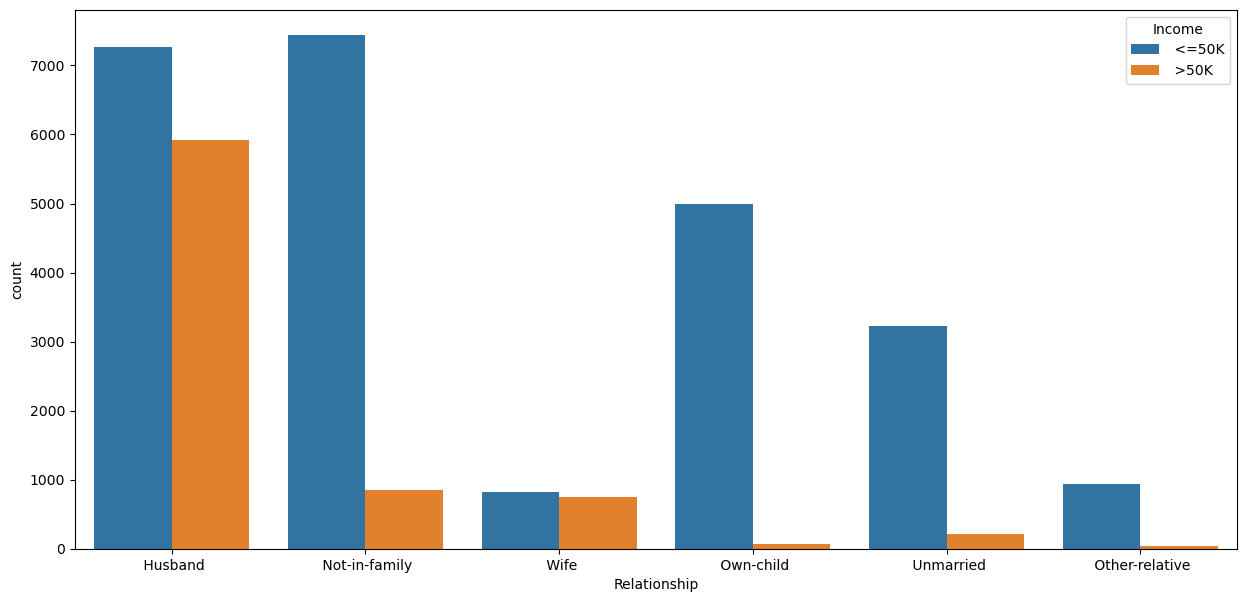

In [151]:
# Income distribution as per Relationship
plt.figure(figsize=(15,7))
sns.countplot(x='Relationship', hue='Income', data=df)

<Axes: xlabel='Race', ylabel='count'>

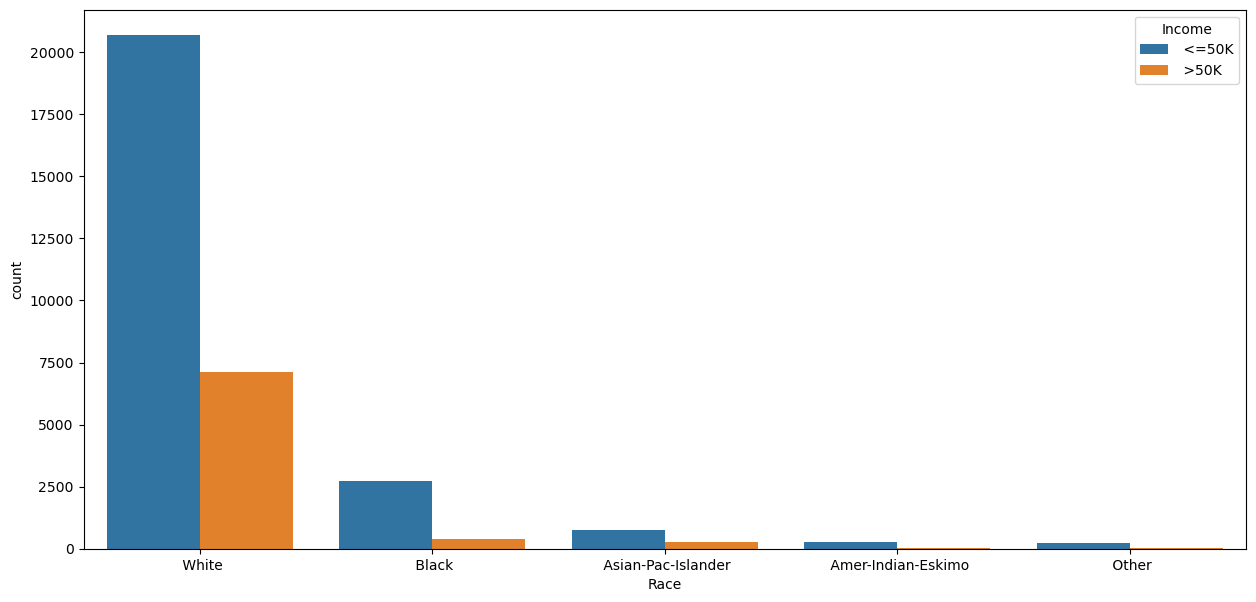

In [152]:
# Income distribution as per Race
plt.figure(figsize=(15,7))
sns.countplot(x='Race', hue='Income', data=df)

<Axes: xlabel='Sex', ylabel='count'>

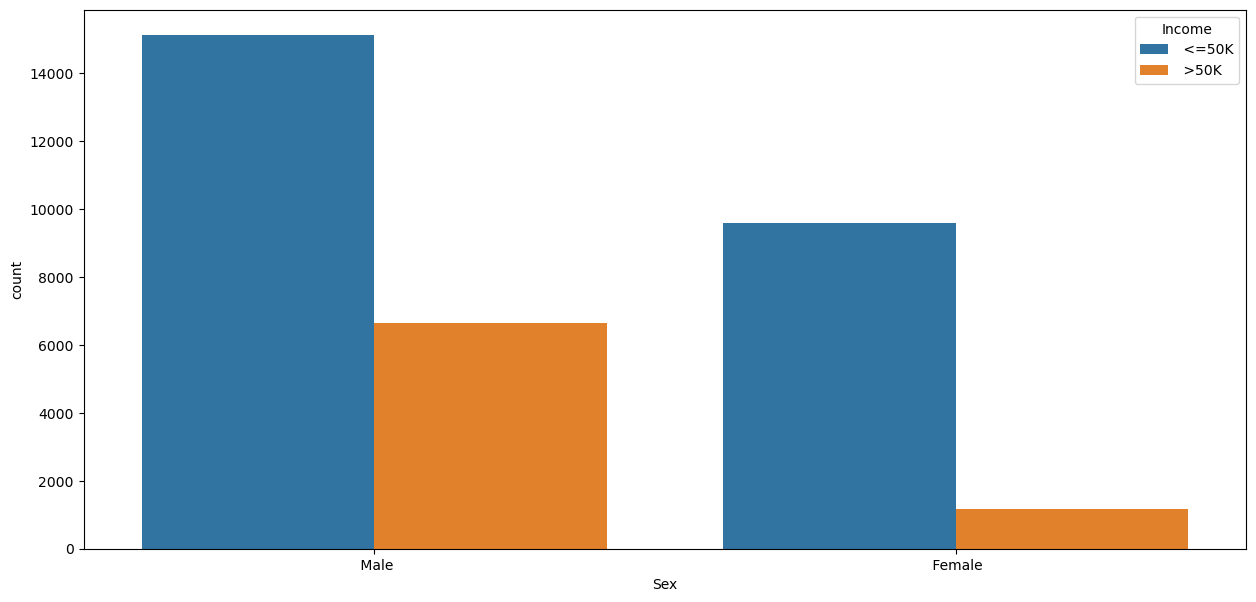

In [153]:
# Income distribution as per Sex
plt.figure(figsize=(15,7))
sns.countplot(x='Sex', hue='Income', data=df)

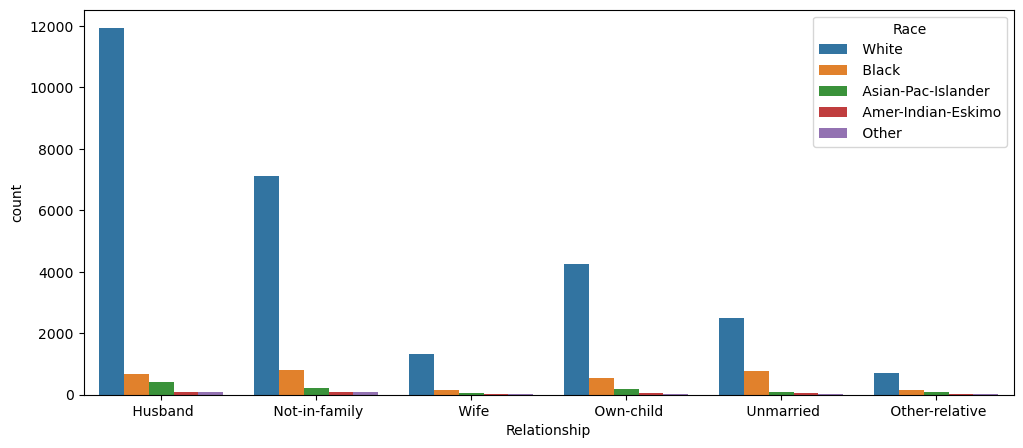

In [154]:
# Race distribution as per Relationship
plt.figure(figsize=(12,5))
sns.countplot(x='Relationship', hue='Race', data=df)
plt.show()

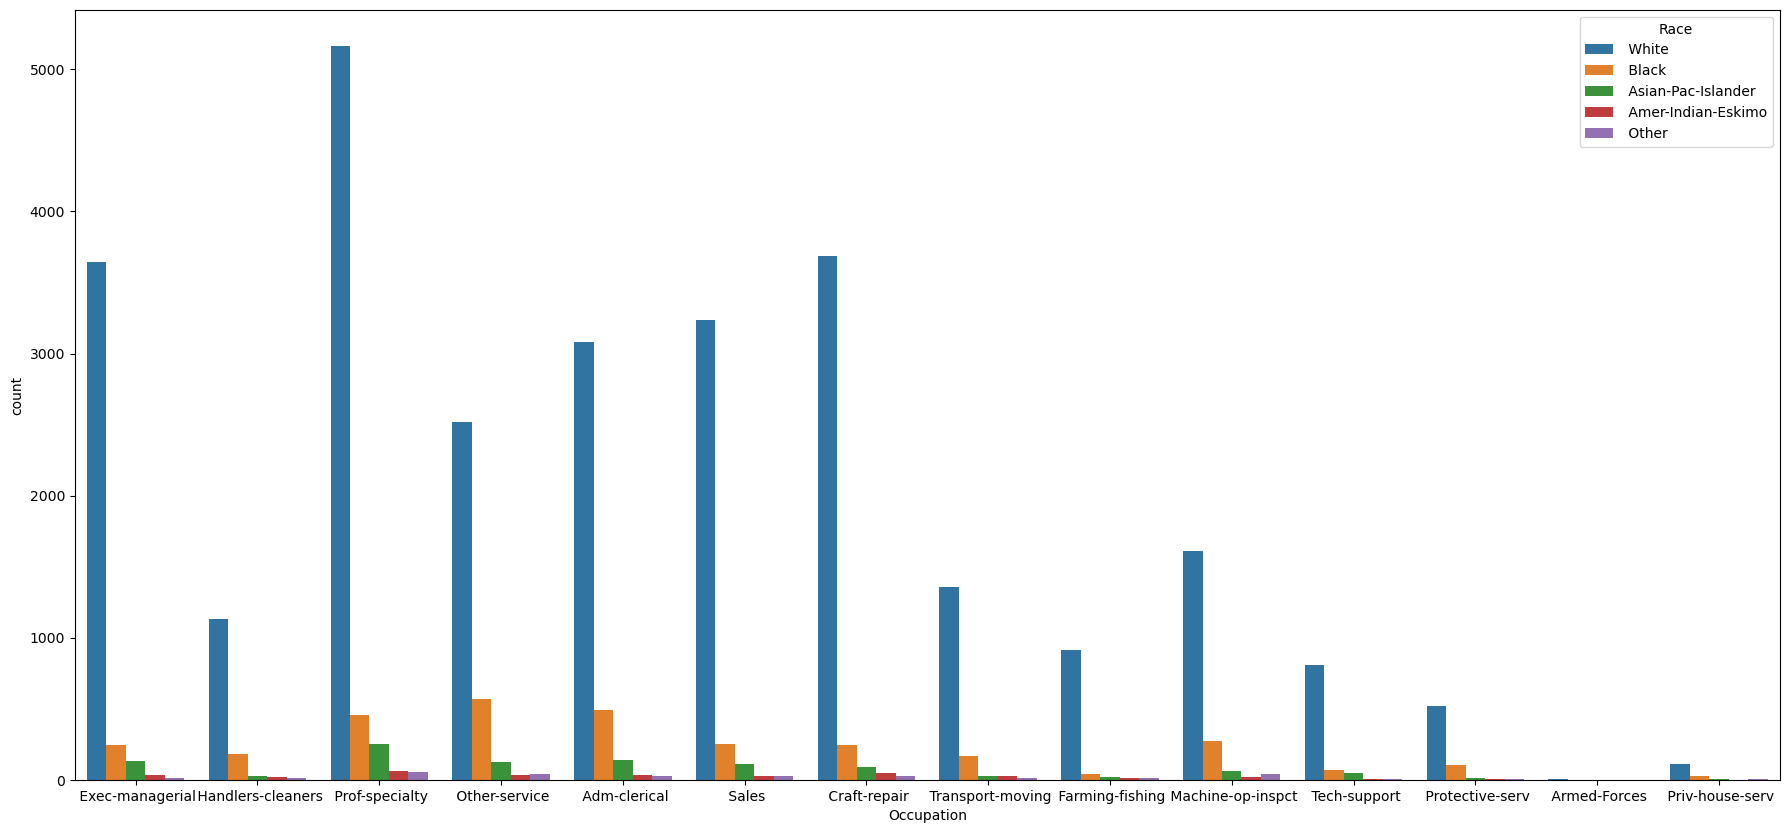

In [155]:
# Race distribution as per Occupation
plt.figure(figsize=(22,10))
sns.countplot(x='Occupation', hue='Race', data=df)
plt.show()

# Encoding categorical data

In [156]:
Category=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

In [157]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


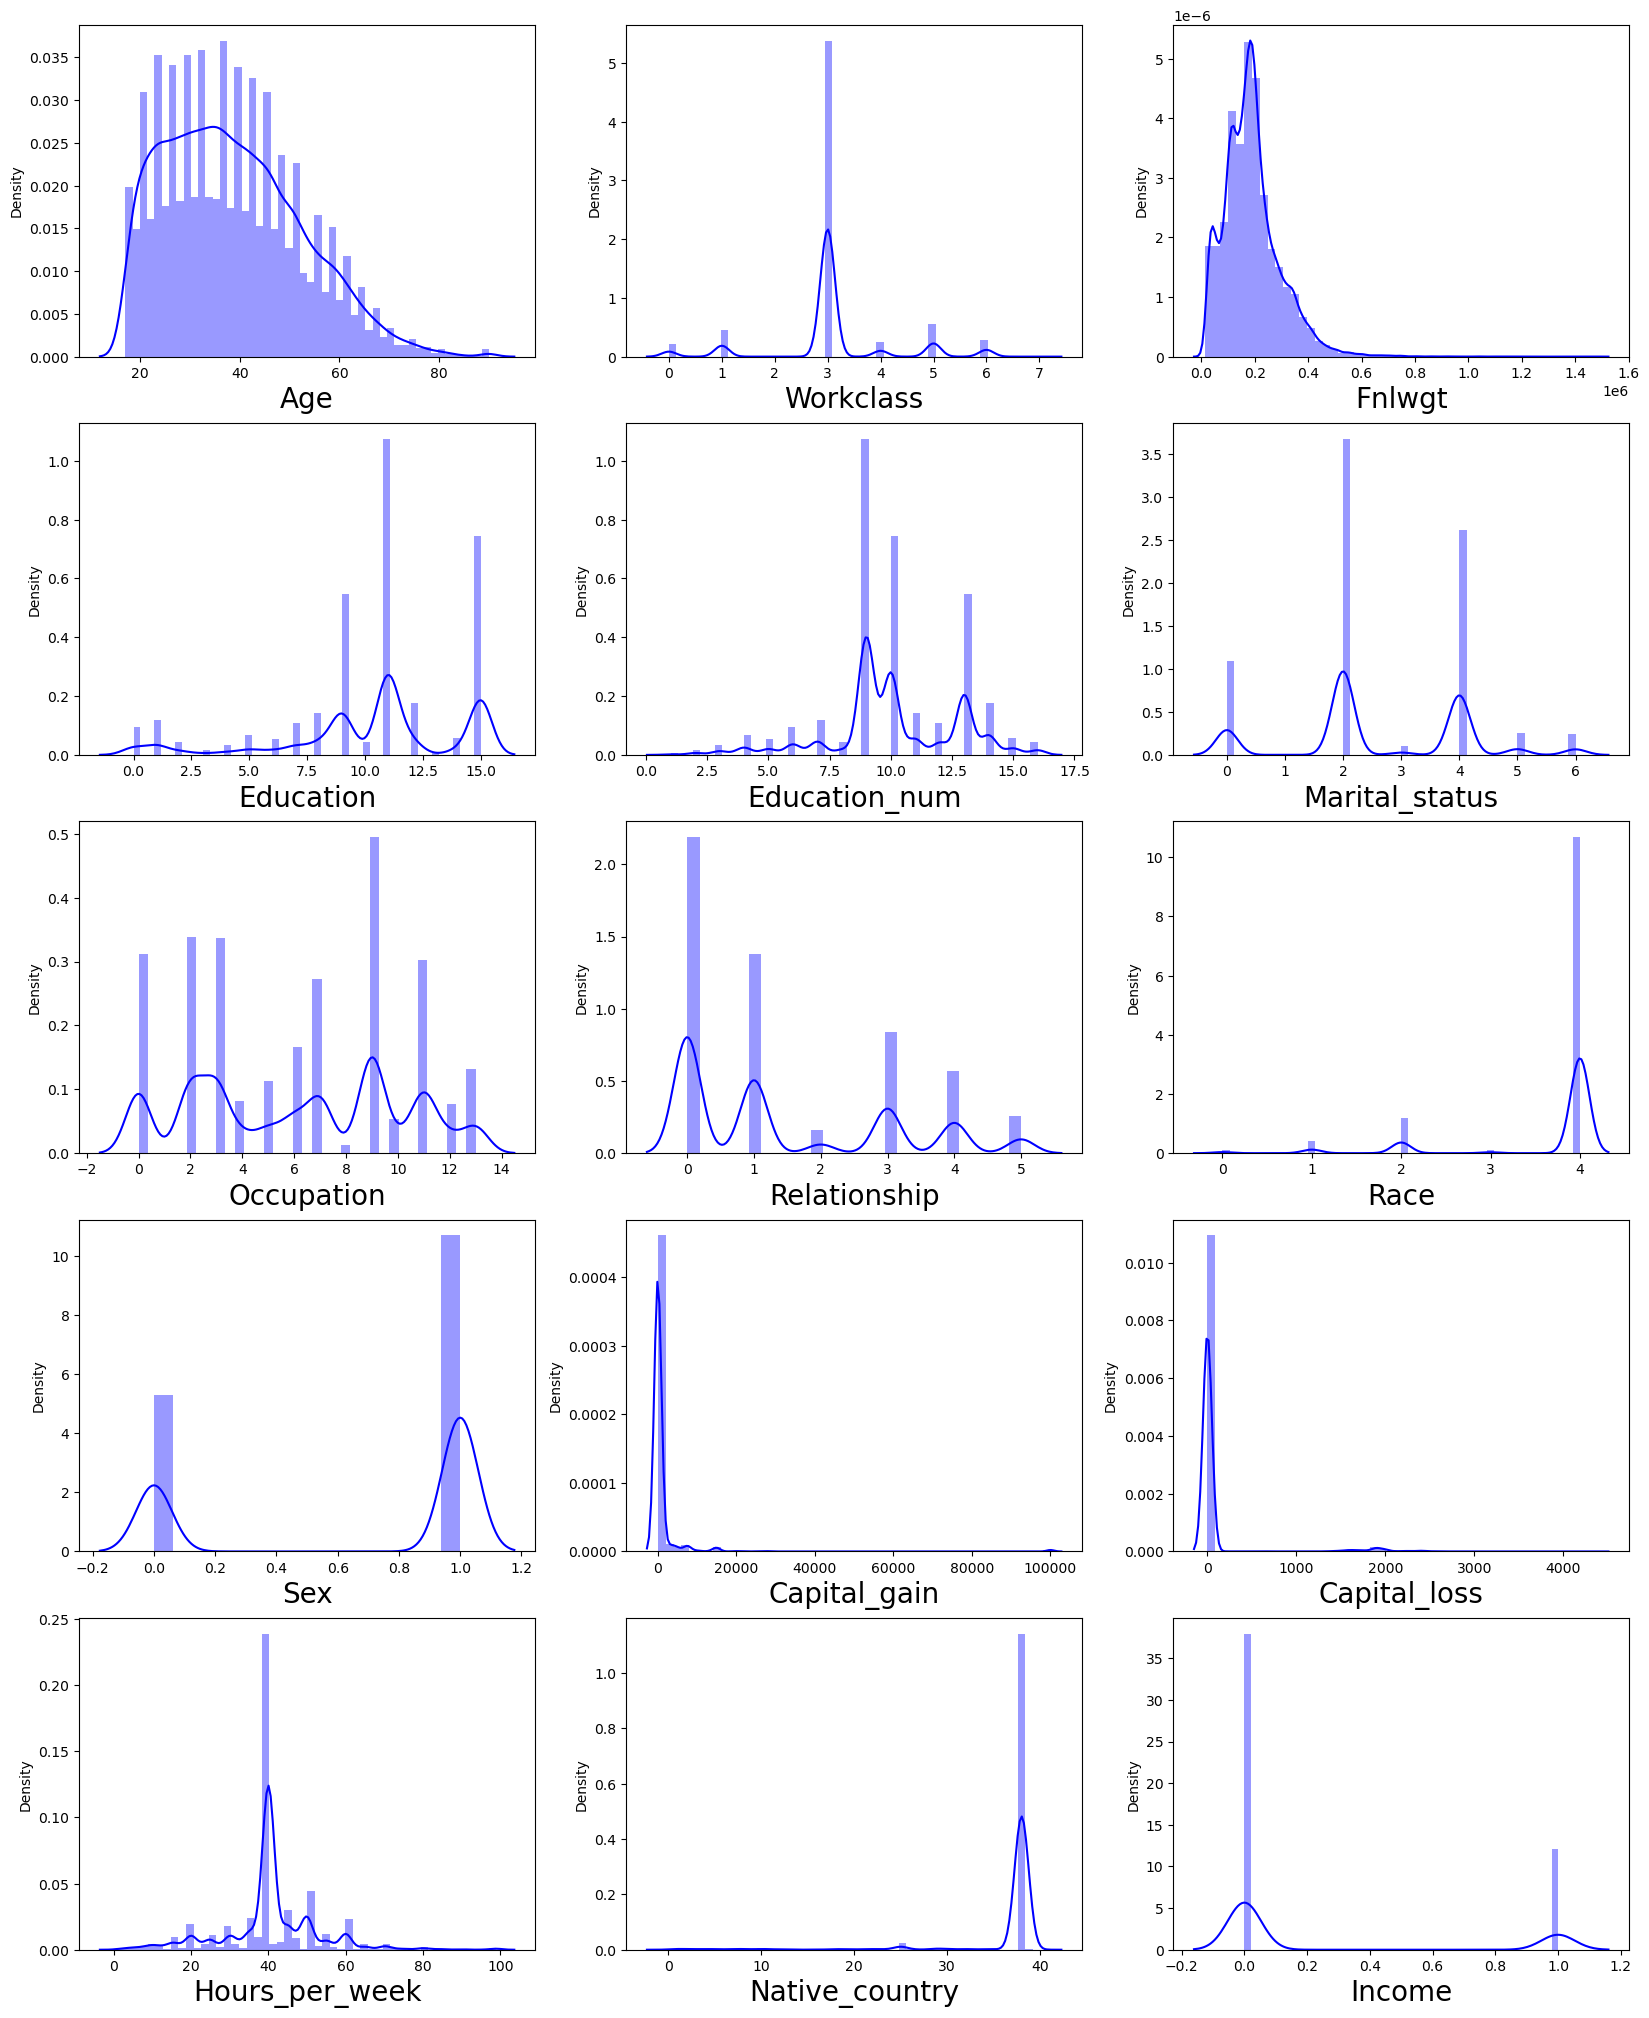

In [158]:
# Subplot
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=18:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[column], color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

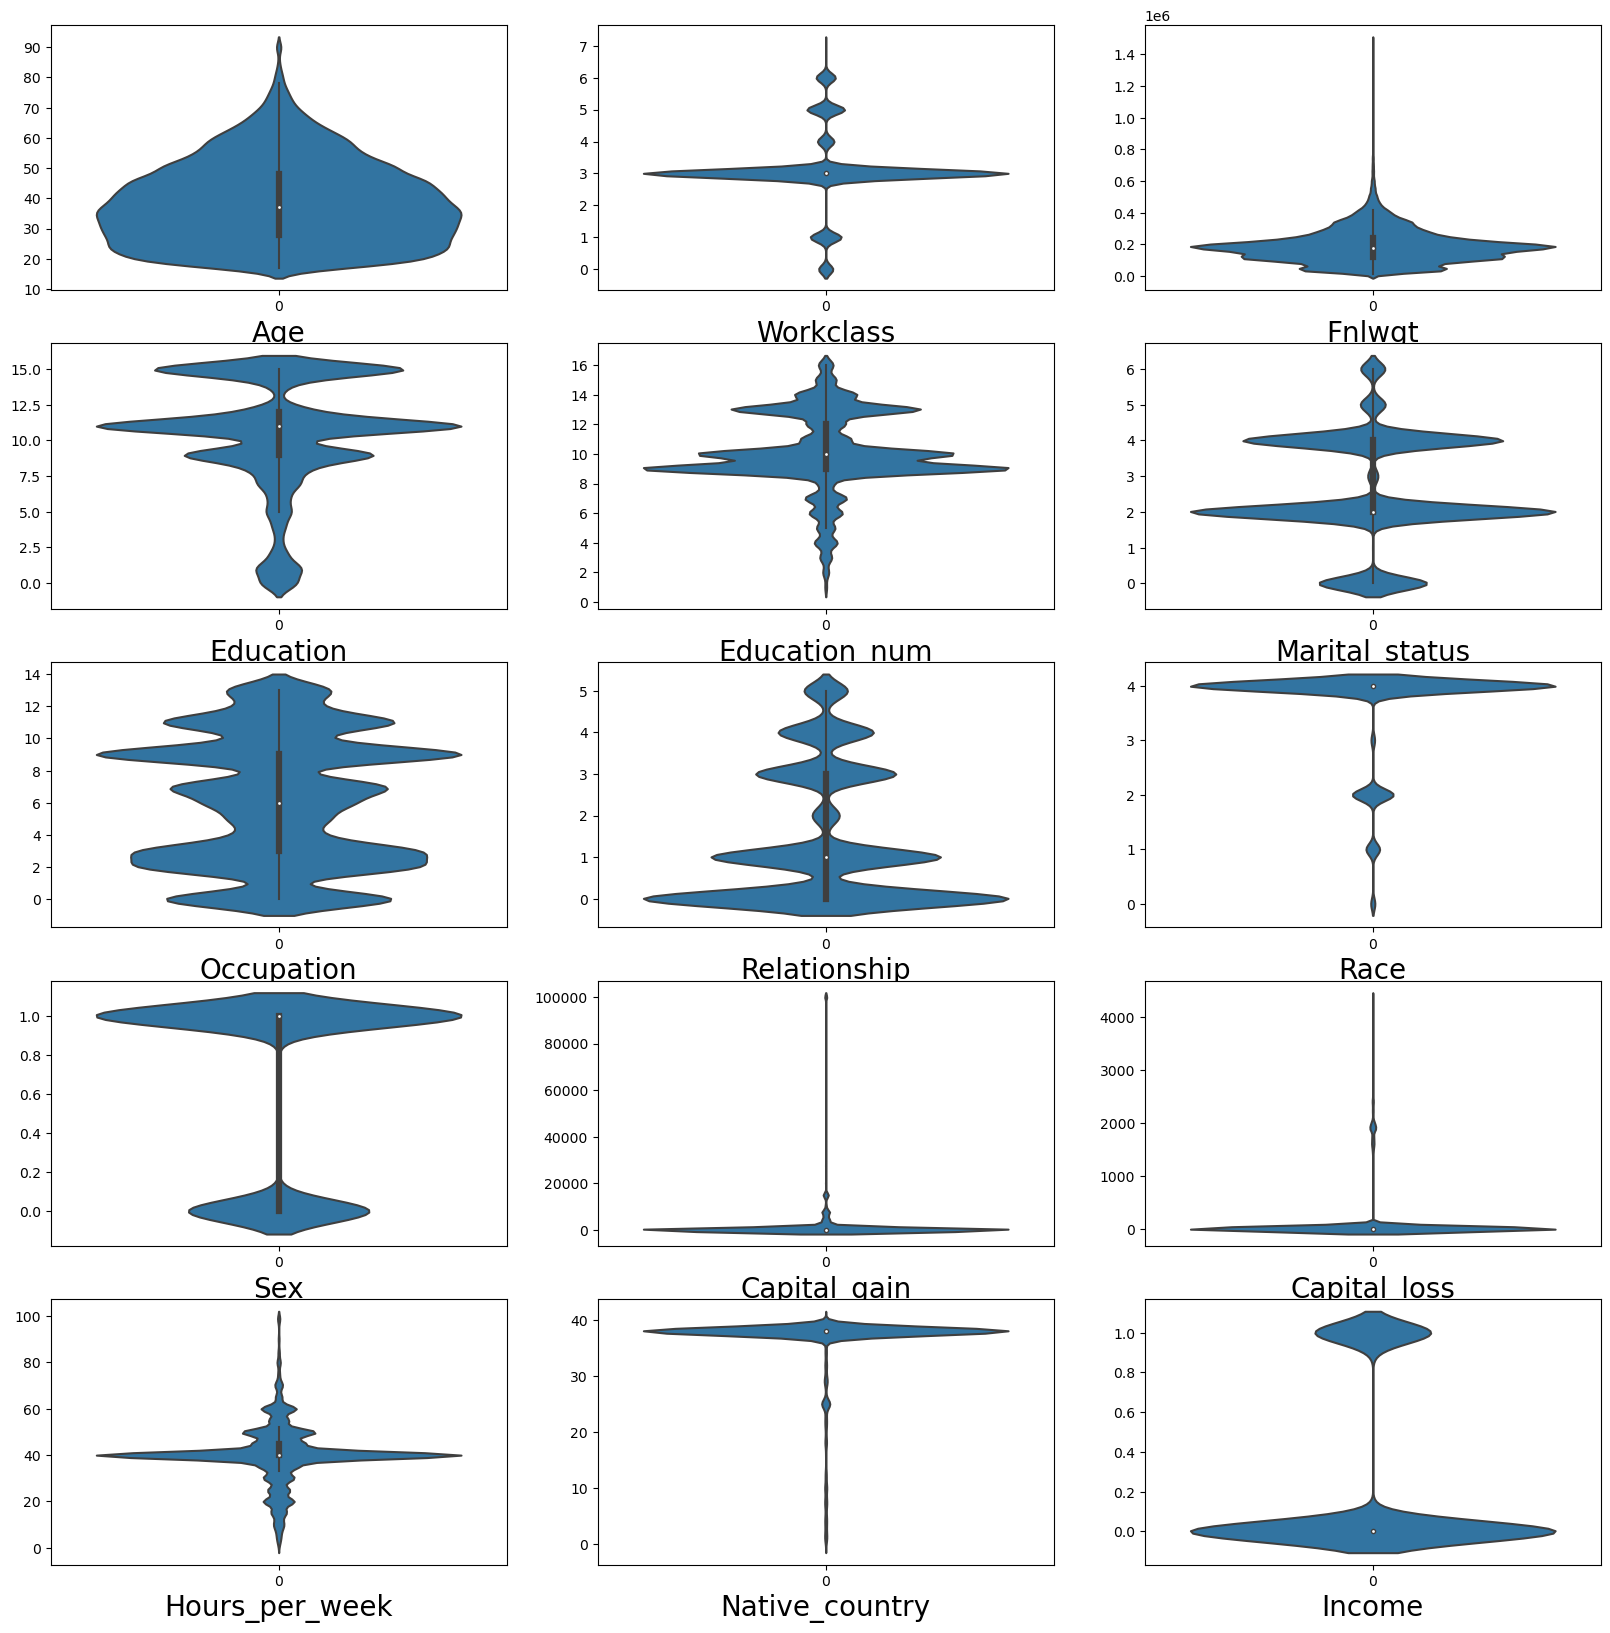

In [159]:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=18:
        ax = plt.subplot(5,3,plotnumber)
        sns.violinplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

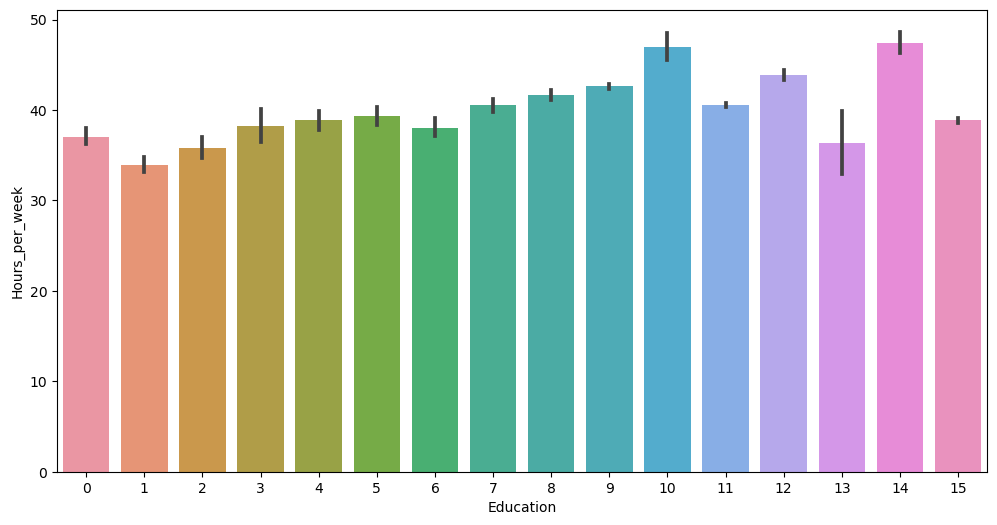

In [160]:
# This shows the hours per week according to the education of the person
plt.figure(figsize=(12,6))
sns.barplot(x='Education', y='Hours_per_week',data=df)
plt.show()

# Outliers Detection and Removal

Age                  Axes(0.125,0.653529;0.110714x0.226471)
Workclass         Axes(0.257857,0.653529;0.110714x0.226471)
Fnlwgt            Axes(0.390714,0.653529;0.110714x0.226471)
Education         Axes(0.523571,0.653529;0.110714x0.226471)
Education_num     Axes(0.656429,0.653529;0.110714x0.226471)
Marital_status    Axes(0.789286,0.653529;0.110714x0.226471)
Occupation           Axes(0.125,0.381765;0.110714x0.226471)
Relationship      Axes(0.257857,0.381765;0.110714x0.226471)
Race              Axes(0.390714,0.381765;0.110714x0.226471)
Sex               Axes(0.523571,0.381765;0.110714x0.226471)
Capital_gain      Axes(0.656429,0.381765;0.110714x0.226471)
Capital_loss      Axes(0.789286,0.381765;0.110714x0.226471)
Hours_per_week           Axes(0.125,0.11;0.110714x0.226471)
Native_country        Axes(0.257857,0.11;0.110714x0.226471)
Income                Axes(0.390714,0.11;0.110714x0.226471)
dtype: object

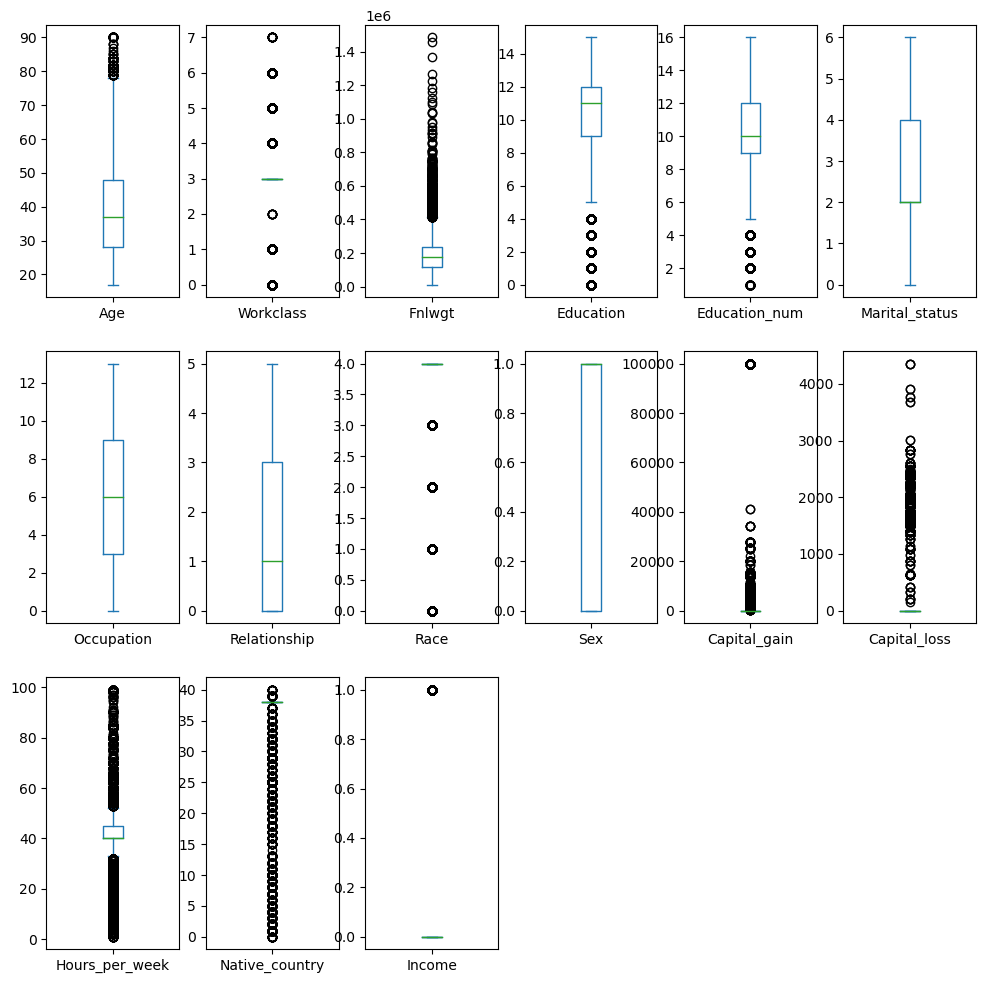

In [161]:
df.plot(kind='box',subplots=True ,layout=(3,6) ,figsize=(12,12))

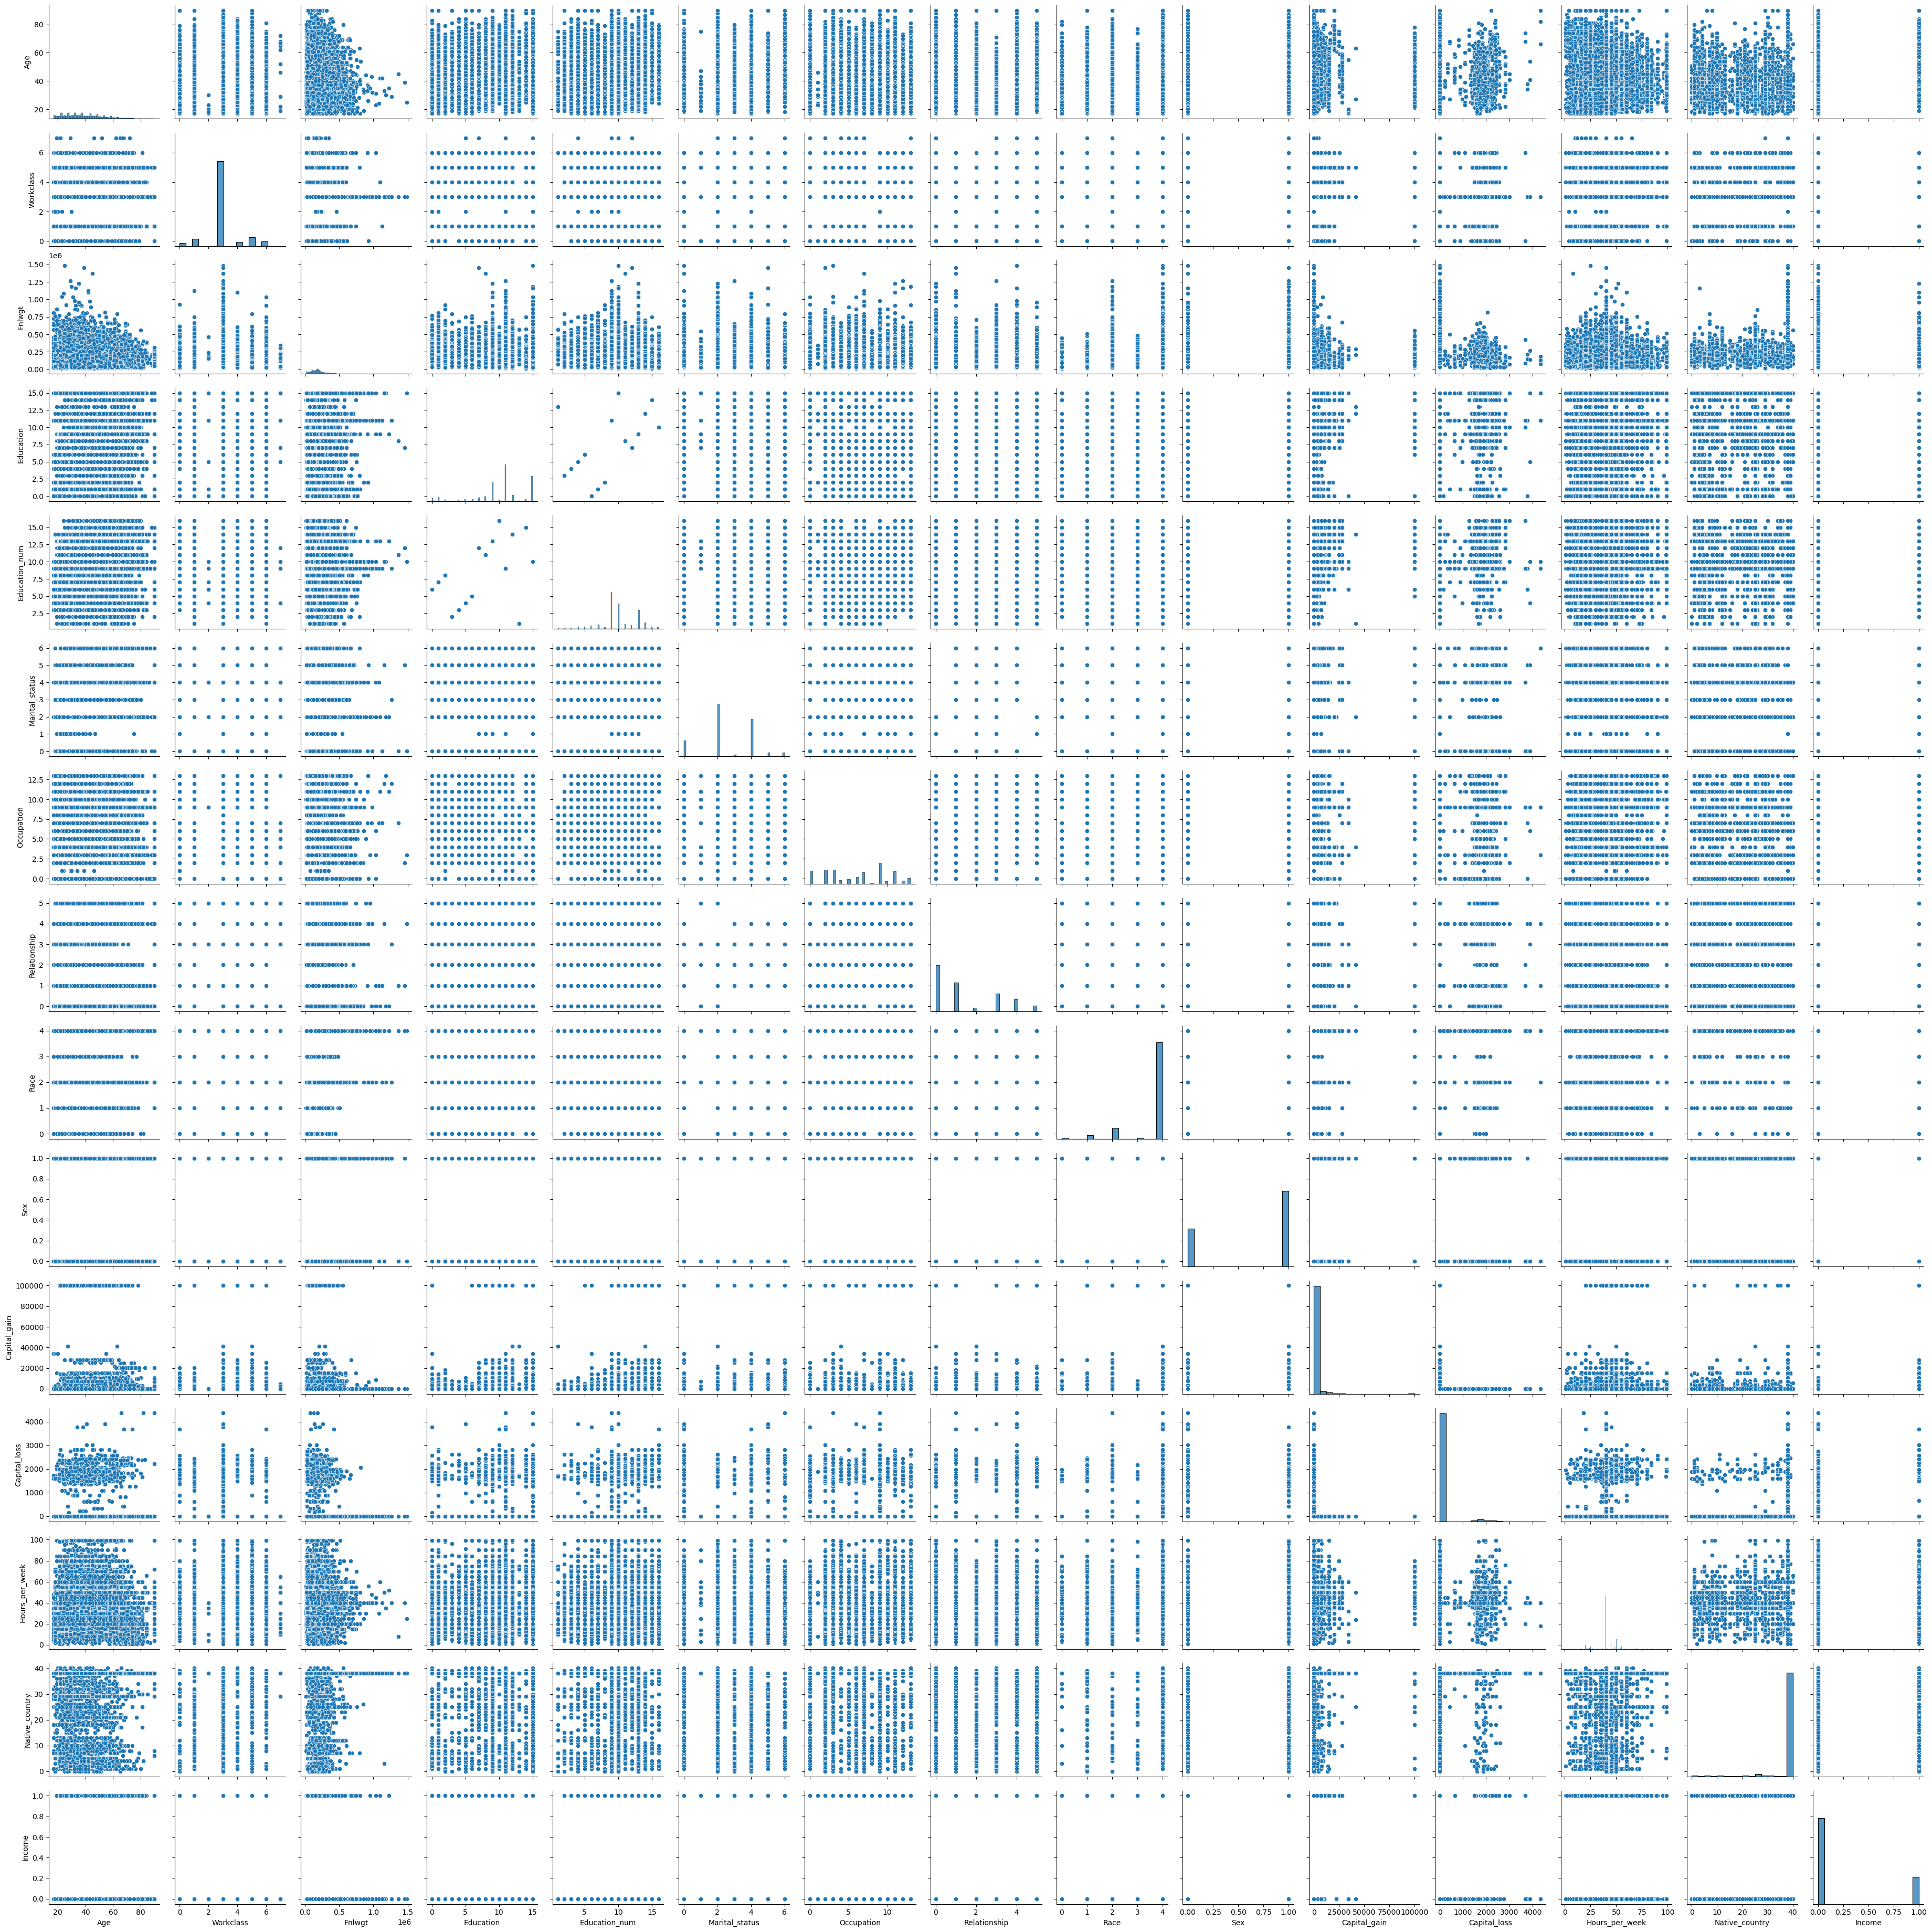

In [162]:
# Pairplot 
sns.pairplot(df)

In [163]:
# Droping unnecessary columns
df.drop(["Fnlwgt", "Education"], axis=1, inplace=True)

# Outliers removal using Zscore method

In [164]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0.836961,1.720777,1.134817,0.405890,0.790197,0.900122,0.393692,0.703036,0.145969,0.216747,2.222450,0.261135,0.563389
1,0.042934,0.085203,0.420646,1.733664,0.286803,0.277868,0.393692,0.703036,0.145969,0.216747,0.035664,0.261135,0.563389
2,1.056935,0.085203,1.198377,0.405890,0.286803,0.900122,1.962450,0.703036,0.145969,0.216747,0.035664,0.261135,0.563389
3,0.776180,0.085203,1.134817,0.405890,0.719986,2.211146,1.962450,1.422403,0.145969,0.216747,0.035664,5.355163,0.563389
4,0.116259,0.085203,1.523683,0.405890,0.790197,2.211146,0.393692,1.422403,0.145969,0.216747,0.035664,0.261135,0.563389
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0.849505,0.085203,0.745951,0.405890,1.475078,2.211146,0.393692,1.422403,0.145969,0.216747,0.197648,0.261135,0.563389
32556,0.103715,0.085203,0.420646,0.405890,0.035106,0.900122,0.393692,0.703036,0.145969,0.216747,0.035664,0.261135,1.774973
32557,1.423558,0.085203,0.420646,2.249657,1.545289,1.588892,0.393692,1.422403,0.145969,0.216747,0.035664,0.261135,0.563389
32558,1.216128,0.085203,0.420646,0.921884,1.545289,0.966639,0.393692,0.703036,0.145969,0.216747,1.655506,0.261135,0.563389


In [165]:
threshold=3
print(np.where(z<3))
dfnew=df[(z<3).all(axis=1)]

(array([    0,     0,     0, ..., 32535, 32535, 32535], dtype=int64), array([ 0,  1,  2, ..., 10, 11, 12], dtype=int64))


In [166]:
dfnew

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,13,2,3,0,4,1,0,0,13,38,0
1,38,3,9,0,5,1,4,1,0,0,40,38,0
2,53,3,7,2,5,0,2,1,0,0,40,38,0
4,37,3,14,2,3,5,4,0,0,0,40,38,0
5,49,3,5,3,7,1,2,0,0,0,16,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,9,4,0,3,4,1,0,0,20,38,0


In [167]:
dfnew.shape

(28061, 13)

In [168]:
df=dfnew.copy()
df.shape

(28061, 13)

In [169]:
df.drop(["Capital_loss"], axis=1, inplace=True)

# Correlation

In [170]:
cor=df.corr()
cor

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Hours_per_week,Native_country,Income
Age,1.000000,0.029674,0.045622,-0.286328,-0.001610,-0.270591,0.021292,0.089469,0.131998,0.090783,0.037494,0.241844
Workclass,0.029674,1.000000,-0.002200,-0.015623,0.008779,-0.057823,0.067532,0.069617,0.011083,0.028104,0.001938,-0.007699
Education_num,0.045622,-0.002200,1.000000,-0.058587,0.073142,-0.092447,0.080766,0.003688,0.157858,0.156303,0.149688,0.320271
Marital_status,-0.286328,-0.015623,-0.058587,1.000000,0.036477,0.183248,-0.084558,-0.125361,-0.069601,-0.196053,-0.032575,-0.194146
Occupation,-0.001610,0.008779,0.073142,0.036477,1.000000,-0.038735,0.000613,0.051055,0.009446,-0.022194,0.018069,0.030664
Relationship,-0.270591,-0.057823,-0.092447,0.183248,-0.038735,1.000000,-0.146432,-0.577195,-0.089095,-0.261919,-0.011274,-0.248263
Race,0.021292,0.067532,0.080766,-0.084558,0.000613,-0.146432,1.000000,0.122731,0.031333,0.055486,0.018660,0.094756
Sex,0.089469,0.069617,0.003688,-0.125361,0.051055,-0.577195,0.122731,1.000000,0.069539,0.236168,-0.011189,0.211792
Capital_gain,0.131998,0.011083,0.157858,-0.069601,0.009446,-0.089095,0.031333,0.069539,1.000000,0.098705,0.019185,0.343487
Hours_per_week,0.090783,0.028104,0.156303,-0.196053,-0.022194,-0.261919,0.055486,0.236168,0.098705,1.000000,0.004380,0.233472


<Axes: >

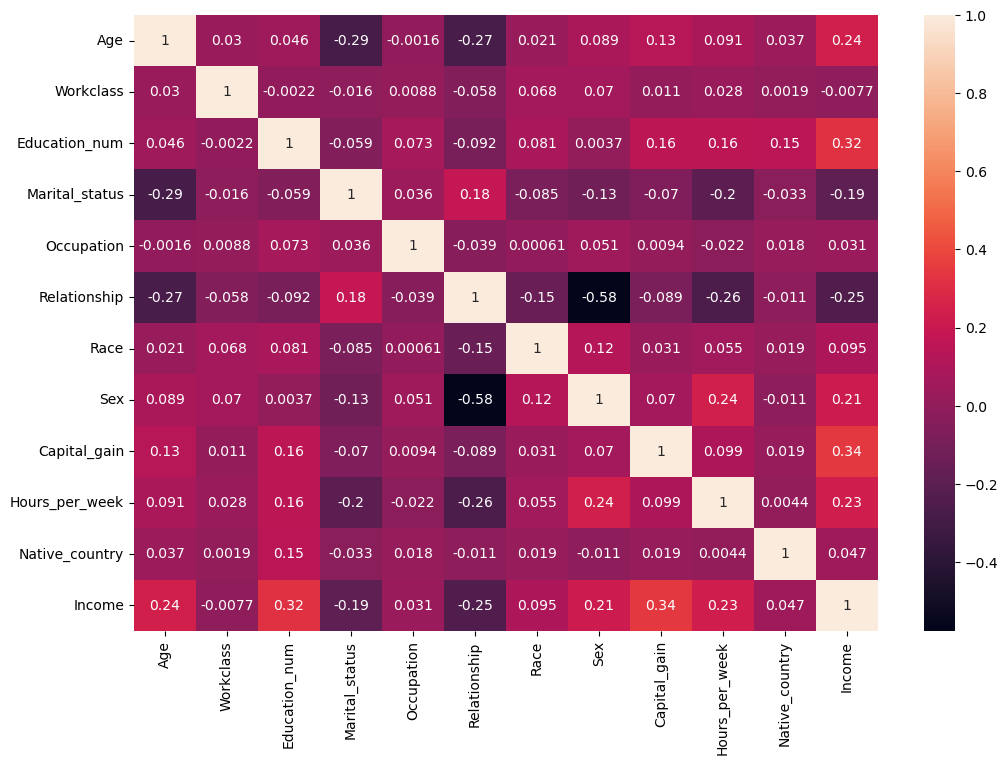

In [171]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

# Machine Learning Model Building

In [172]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [173]:
X=df.drop(['Income'], axis=1)
Y=df['Income']

In [174]:
X

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Hours_per_week,Native_country
0,50,5,13,2,3,0,4,1,0,13,38
1,38,3,9,0,5,1,4,1,0,40,38
2,53,3,7,2,5,0,2,1,0,40,38
4,37,3,14,2,3,5,4,0,0,40,38
5,49,3,5,3,7,1,2,0,0,16,22
...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,12,2,12,5,4,0,0,38,38
32556,40,3,9,2,6,0,4,1,0,40,38
32557,58,3,9,6,0,4,4,0,0,40,38
32558,22,3,9,4,0,3,4,1,0,20,38


In [175]:
Y

0        0
1        0
2        0
4        0
5        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 28061, dtype: int32

In [176]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, random_state=42, test_size=.20)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(22448, 11)
(22448,)
(5613, 11)
(5613,)


# Using Logistic Regression

In [178]:
LR=LogisticRegression()
LR.fit(X_train,Y_train)

LogisticRegression()

In [179]:
LRpred=LR.predict(X_test)
LRpred

array([0, 0, 0, ..., 1, 0, 1])

In [180]:
accuracy_score(Y_test,LRpred)

0.8277213611259576

In [181]:
confusion_matrix(Y_test,LRpred)

array([[4144,  194],
       [ 773,  502]], dtype=int64)

In [182]:
print(classification_report(Y_test,LRpred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      4338
           1       0.72      0.39      0.51      1275

    accuracy                           0.83      5613
   macro avg       0.78      0.67      0.70      5613
weighted avg       0.82      0.83      0.81      5613



Acurracy using Logistic Regression is 82.77

# Using Decision Tree Classifier

In [188]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,Y_train)

DecisionTreeClassifier()

In [189]:
DTCpred=DTC.predict(X_test)
DTCpred

array([0, 0, 0, ..., 0, 0, 1])

In [190]:
accuracy_score(Y_test,DTCpred)

0.8134687332977018

In [191]:
confusion_matrix(Y_test,DTCpred)

array([[3834,  504],
       [ 543,  732]], dtype=int64)

In [192]:
print(classification_report(Y_test,DTCpred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4338
           1       0.59      0.57      0.58      1275

    accuracy                           0.81      5613
   macro avg       0.73      0.73      0.73      5613
weighted avg       0.81      0.81      0.81      5613



Acurracy using Decision Tree Classifier is 81.34

# Using Random Forest Classifier

In [183]:
RFC=RandomForestClassifier()
RFC.fit(X_train,Y_train)

RandomForestClassifier()

In [184]:
RFCpred=RFC.predict(X_test)
RFCpred

array([0, 0, 0, ..., 0, 0, 1])

In [185]:
accuracy_score(Y_test,RFCpred)

0.8444681988241582

In [186]:
confusion_matrix(Y_test,RFCpred)

array([[3998,  340],
       [ 533,  742]], dtype=int64)

In [187]:
print(classification_report(Y_test,RFCpred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4338
           1       0.69      0.58      0.63      1275

    accuracy                           0.84      5613
   macro avg       0.78      0.75      0.77      5613
weighted avg       0.84      0.84      0.84      5613



Acurracy using Random Forest Classifier is 84.44

# Saving Model

In [193]:
import joblib
joblib.dump(RFC,'Census_Income.obj')

['Census_Income.obj']